In [ ]:
import arviz as az
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from sklearn.datasets import make_regression
from sklearn.ensemble import HistGradientBoostingRegressor

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
seed: int = sum(map(ord, "seed"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

In [3]:
x_raw, y = make_regression(
    n_samples=200,
    n_features=2,
    noise=0.5,
    n_informative=2,
    effective_rank=2,
    random_state=seed,
)

x = np.power(x_raw + np.max([np.abs(x_raw.min()), np.abs(x_raw).max()]), 0.8)

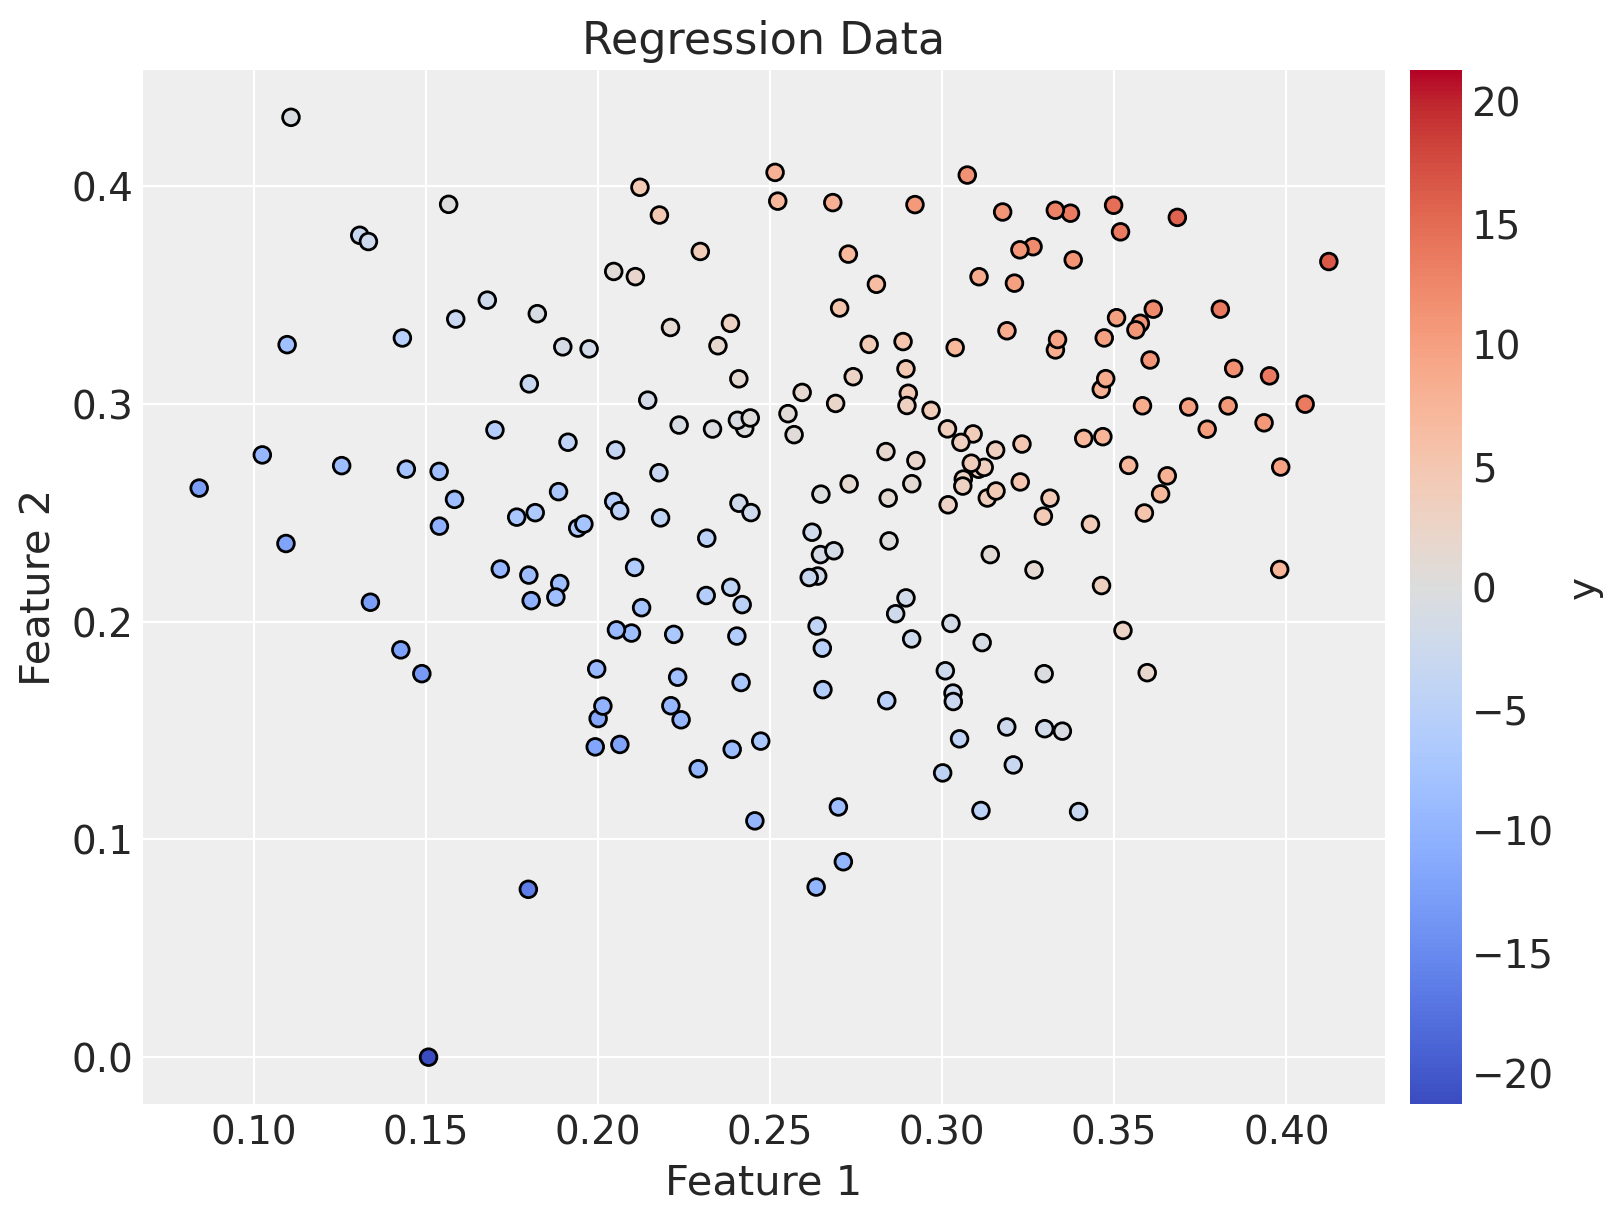

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

norm = mcolors.Normalize(vmin=-np.max(np.abs(y)), vmax=np.max(np.abs(y)))
sc = ax.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm", norm=norm, edgecolors="black")
cbar = plt.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label("y", fontsize=14)
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Regression Data");

In [5]:
model = HistGradientBoostingRegressor()

model.fit(x, y)

HistGradientBoostingRegressor()

In [6]:
y_pred = model.predict(x)

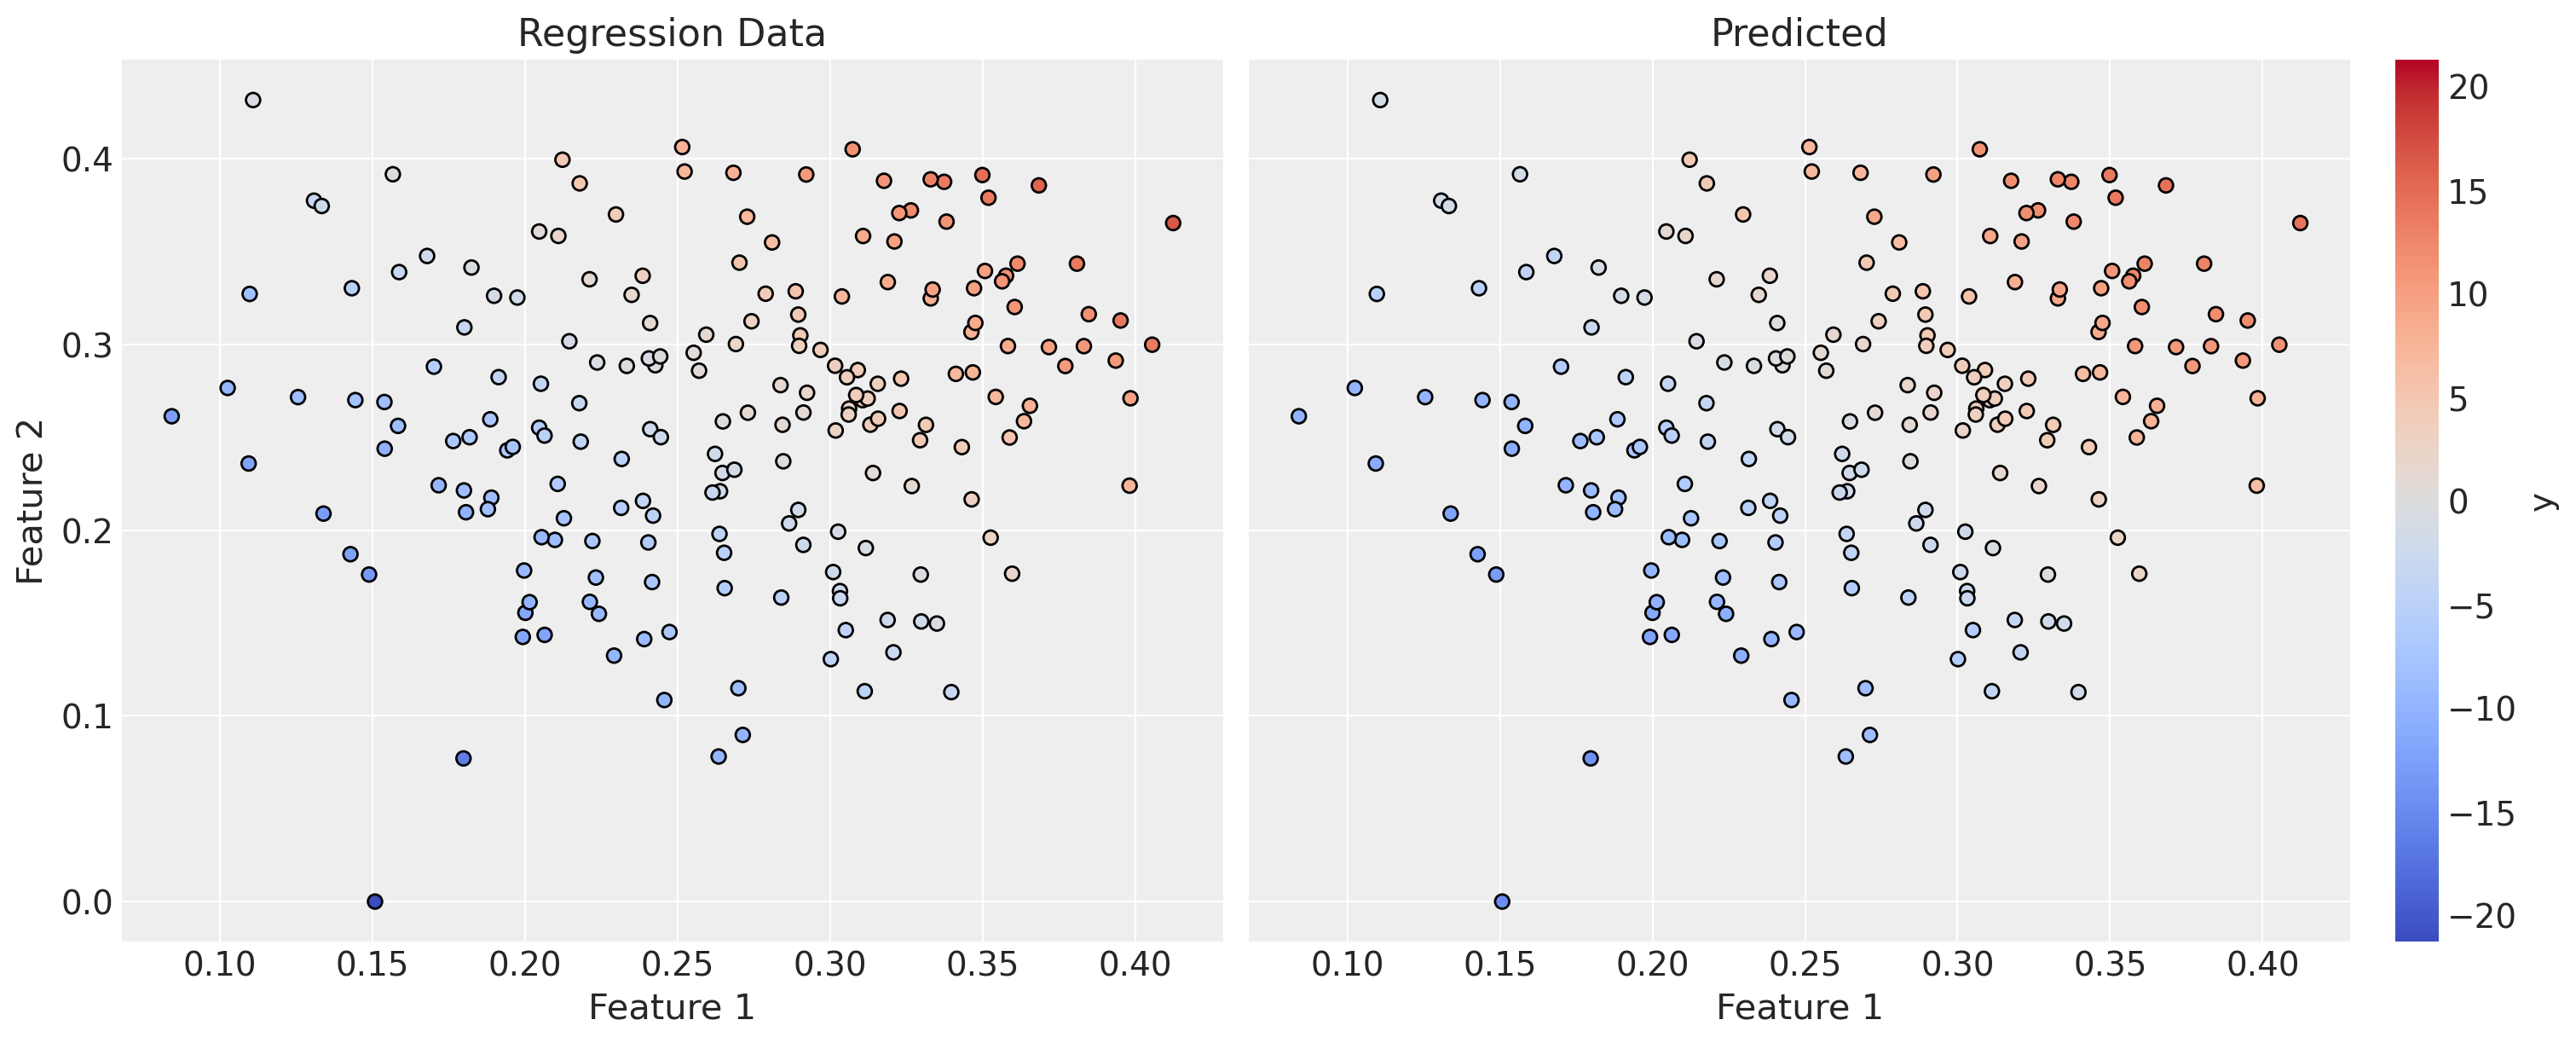

In [9]:
fig, ax = plt.subplots(
    nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15, 6), layout="constrained"
)

sc_0 = ax[0].scatter(
    x[:, 0], x[:, 1], c=y, cmap="coolwarm", norm=norm, edgecolors="black"
)

norm = mcolors.Normalize(vmin=-np.max(np.abs(y)), vmax=np.max(np.abs(y)))
cbar = plt.colorbar(sc_0, ax=ax, pad=0.02)
cbar.set_label("y", fontsize=14)


ax[0].set(xlabel="Feature 1", ylabel="Feature 2", title="Regression Data")

sc_1 = ax[1].scatter(
    x[:, 0], x[:, 1], c=y_pred, cmap="coolwarm", norm=norm, edgecolors="black"
)
ax[1].set(xlabel="Feature 1", ylabel=None, title="Predicted");

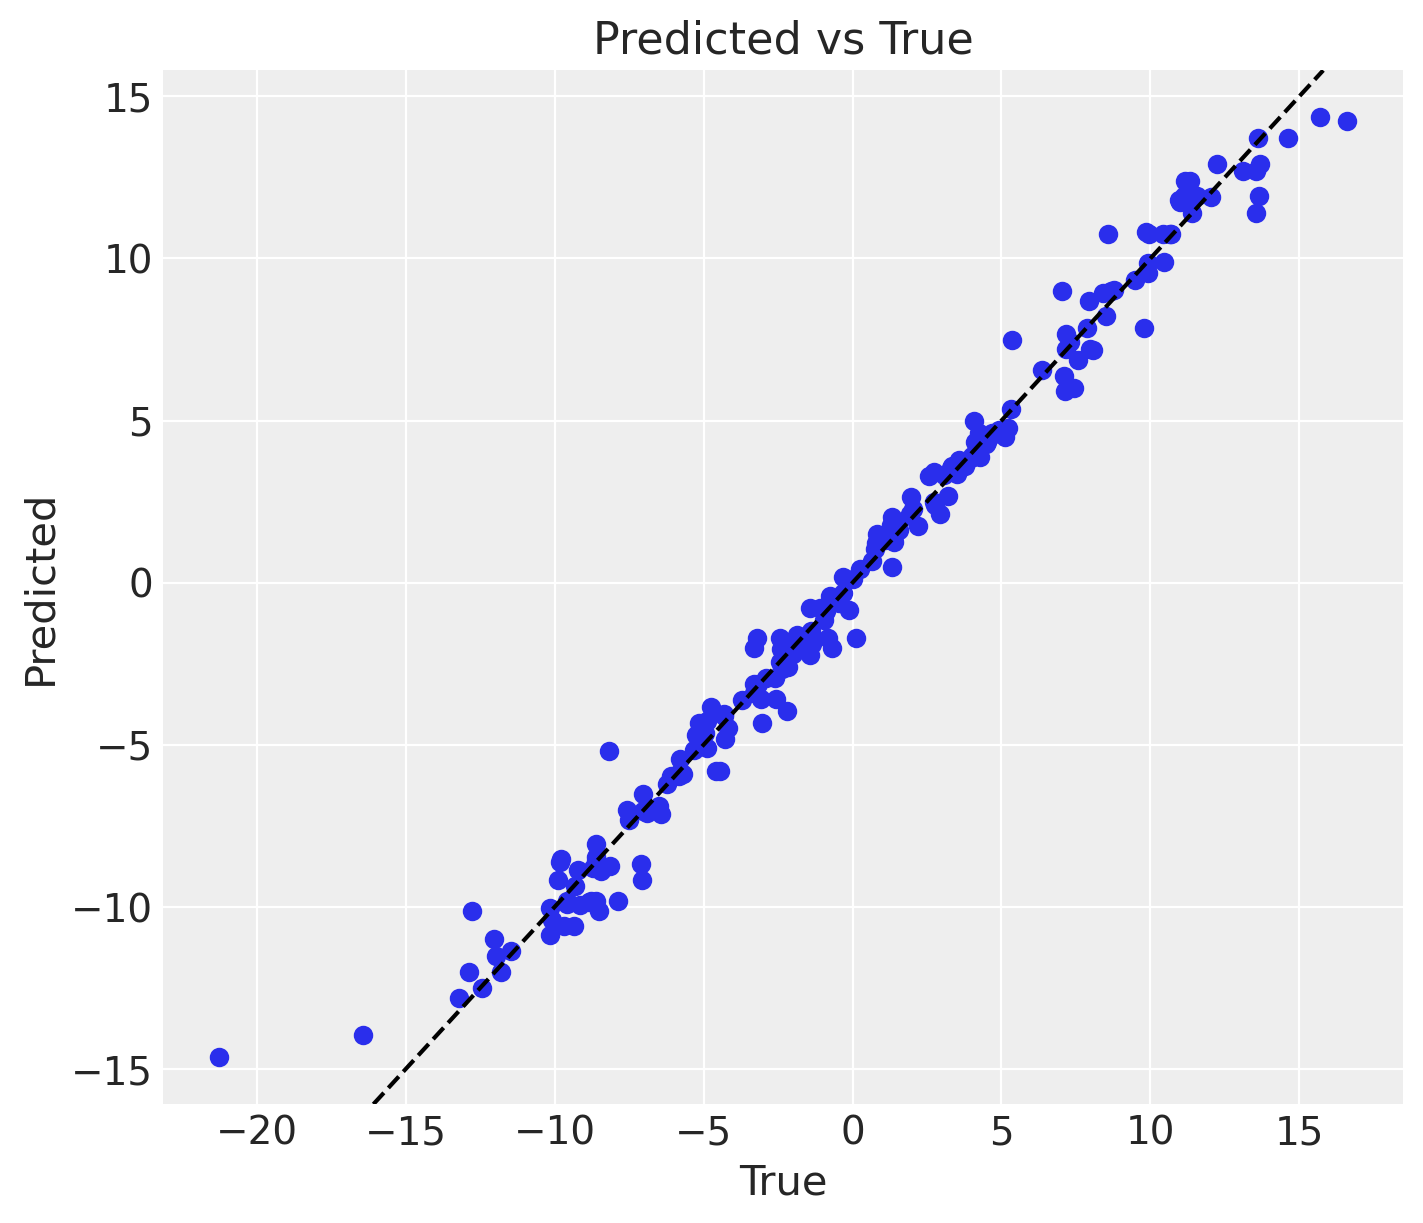

In [10]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(y, y_pred)
ax.axline(xy1=(0, 0), slope=1, color="black", linestyle="--")
ax.set(xlabel="True", ylabel="Predicted", title="Predicted vs True");

In [36]:
x2_fixed = 0.25


def model_predict_at_x2_fixed(x1: float, x2_fixed: float = 0.25) -> float:
    return model.predict(np.c_[x1, x2_fixed]).item()


x1_grid = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
y_pred_grid = np.vectorize(model_predict_at_x2_fixed)(x1_grid)

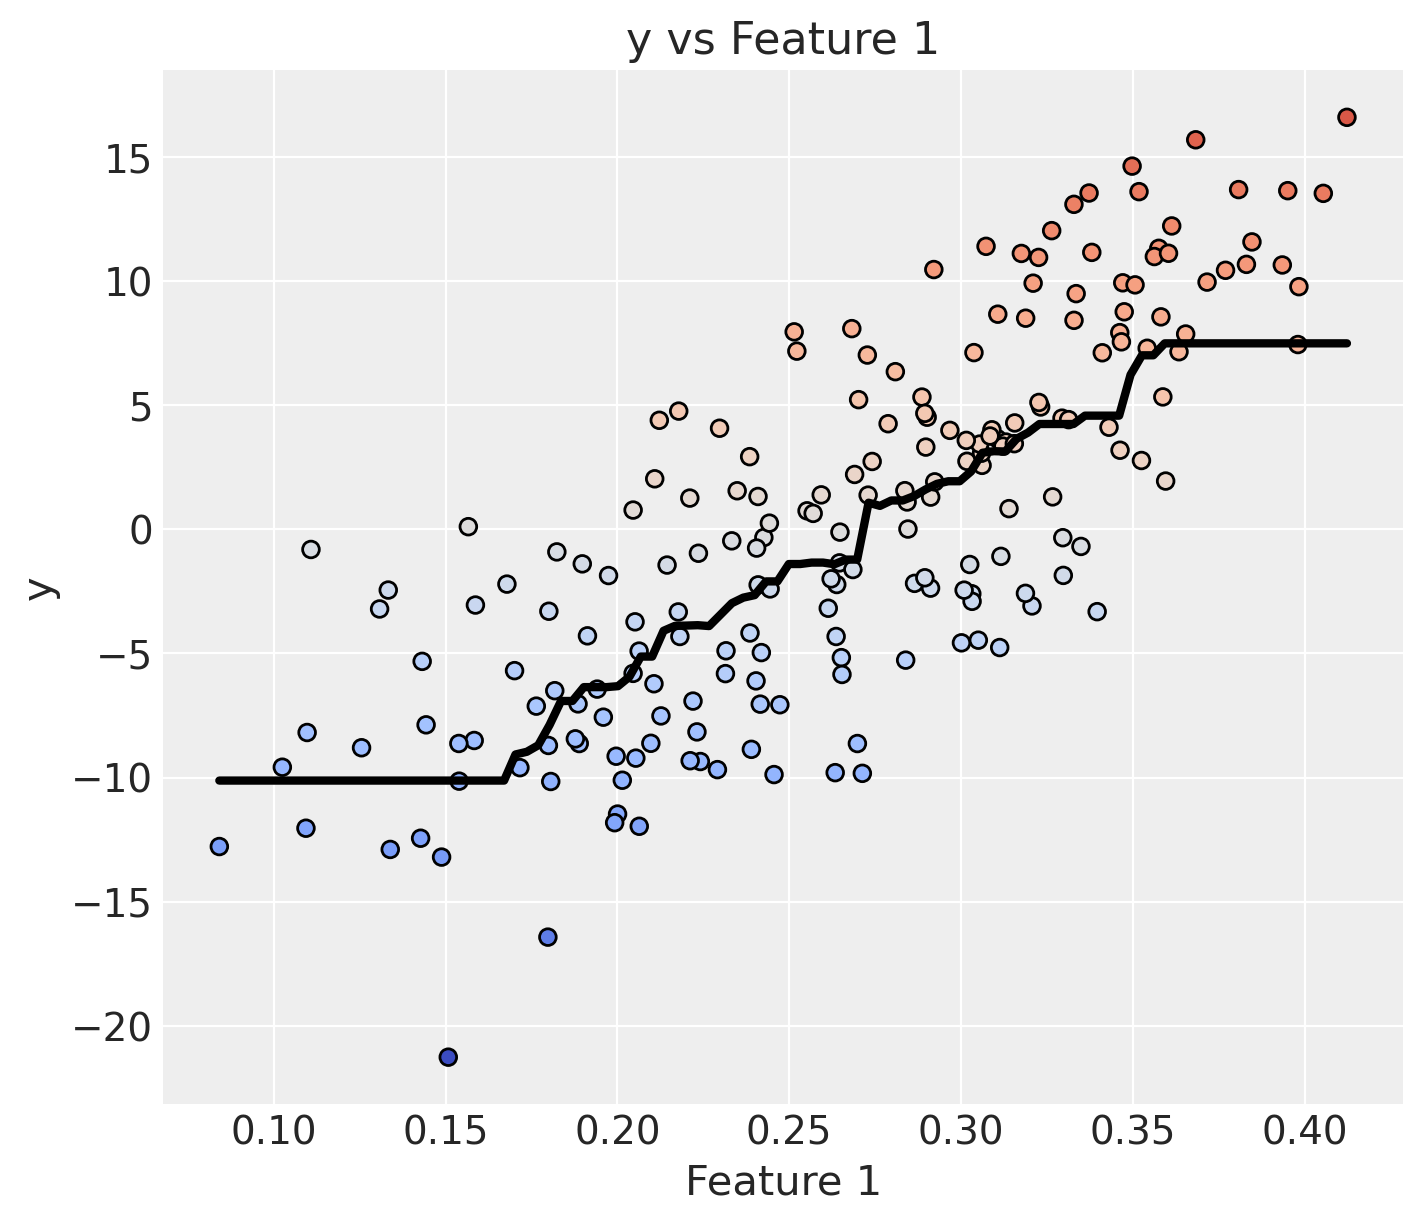

In [37]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x[:, 0], y, c=y, cmap="coolwarm", norm=norm, edgecolors="black")
ax.plot(x1_grid, y_pred_grid, c="black", linewidth=3)
ax.set(xlabel="Feature 1", ylabel="y", title="y vs Feature 1");

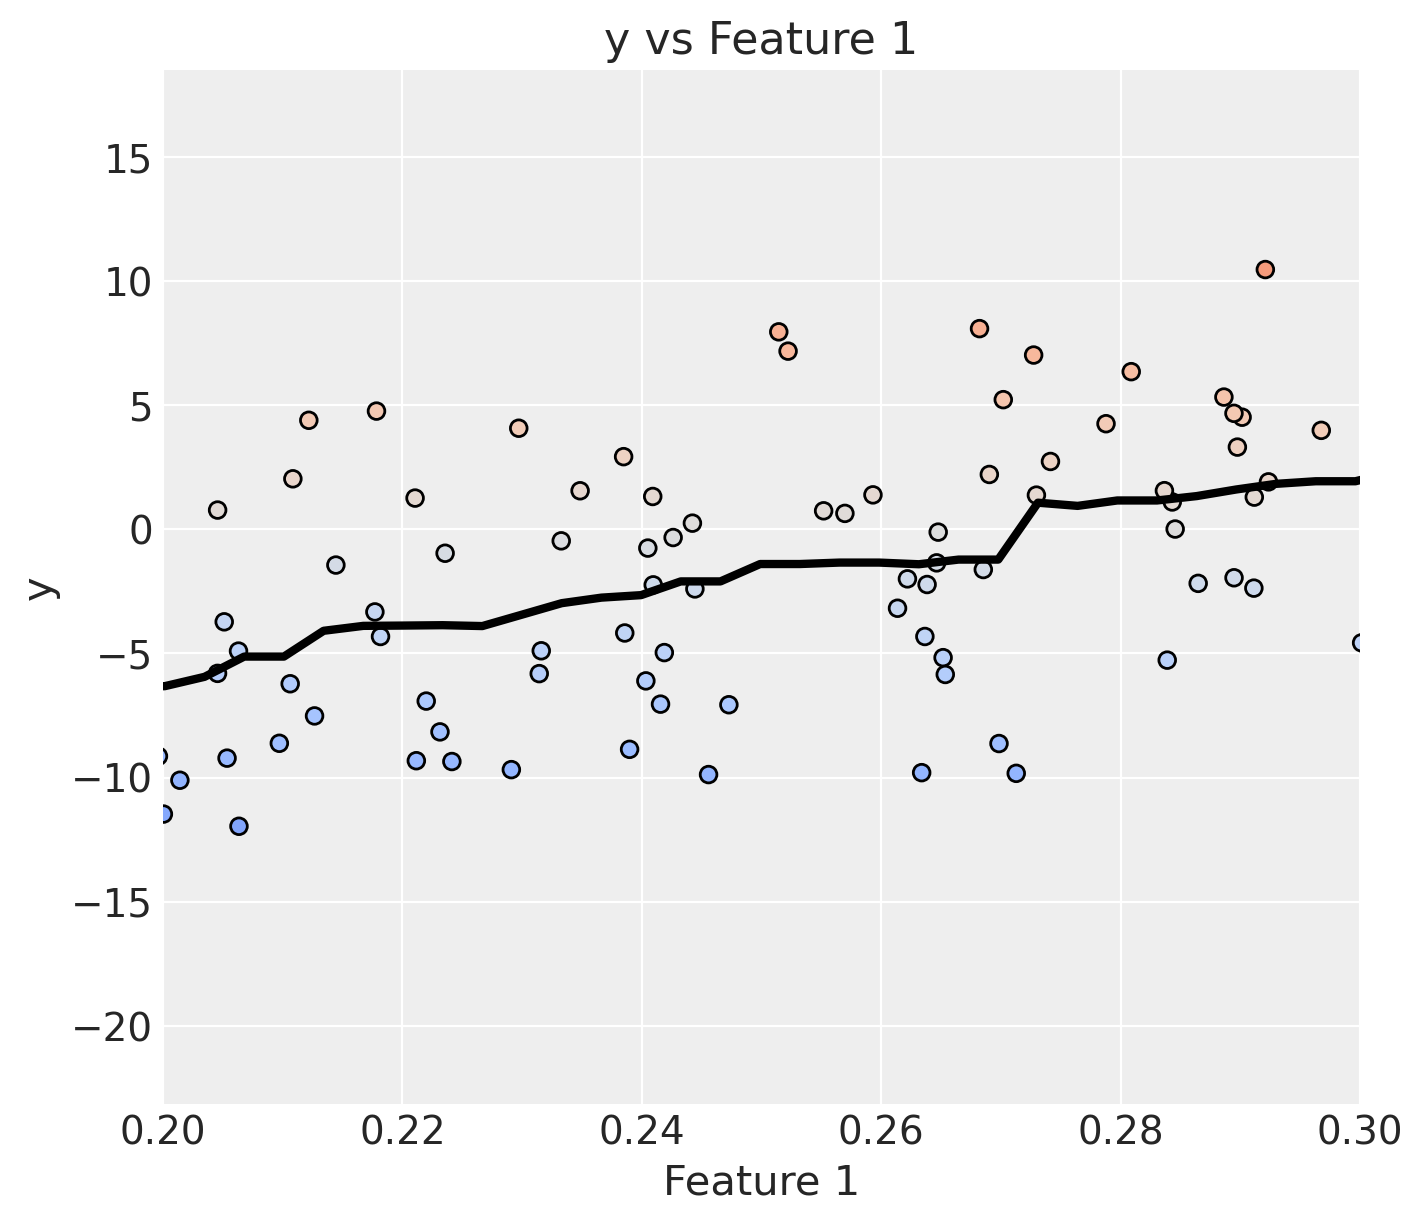

In [72]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(x[:, 0], y, c=y, cmap="coolwarm", norm=norm, edgecolors="black")
ax.plot(x1_grid, y_pred_grid, c="black", linewidth=3)
ax.set(xlabel="Feature 1", ylabel="y", title="y vs Feature 1", xlim=(0.2, 0.3));

In [75]:
# Note: Tree-based models have piecewise constant predictions,
# so gradient-based optimizers (default BFGS) won't work (gradient is zero almost everywhere).
# Use a gradient-free method like Nelder-Mead or Powell.
optimization_result = minimize(
    model_predict_at_x2_fixed, x0=0.25, method="Nelder-Mead", bounds=[(0.22, 0.27)]
)

In [76]:
optimization_result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -3.897095581472644
             x: [ 2.250e-01]
           nit: 9
          nfev: 23
 final_simplex: (array([[ 2.250e-01],
                       [ 2.251e-01]]), array([-3.897e+00, -3.897e+00]))